<h1> ACTIVITY 1 - PALMER PENGUINS DATA ANALYTICS PROJECT</h1>
<hr>

<h2> Analyst: Rhealyn Vasquez</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('datasets\\penguins.csv')

df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


<h1> 1. How many rows have at least one missing value?</h1>

In [2]:
df.isnull().any(axis=1).sum()

np.int64(11)

<h3> Insight: </h3>
<p>Checking missing values early helps you understand data quality.</p>

<h1> 2. What is the most common species in the dataset? </h1>

In [3]:
most_common_species = df['species'].mode()[0]
most_common_species

'Adelie'

<h3> Insight: </h3>
<p>Shows which species was seen most often.</p>

<h1> 3. Which island has the highest average bill length? </h1>

In [4]:
island_max_bill = df.groupby('island')['bill_length_mm'].mean().idxmax()
island_max_bill


'Biscoe'

<h3> Insight: </h3>
<p>Bill length differences often relate to feeding habits and prey availability on each island. </p>

<h1> 4. Which species has the largest variation in flipper length? </h1>

In [5]:
species_flipper_var = df.groupby('species')['flipper_length_mm'].std().idxmax()
species_flipper_var

'Chinstrap'

<h3> Insight: </h3>
<p>Variation suggests diversity within the species possibly due to age, sex, or regional differences. </p>

<h1> 5 .Which penguin has the longest bill length and what species is it? </h1>

In [6]:
longest_bill_penguin = df.loc[df['bill_length_mm'].idxmax(), ['species', 'bill_length_mm']]
longest_bill_penguin

species           Gentoo
bill_length_mm      59.6
Name: 185, dtype: object

<h3>Insight:</h3>
<p> Longer bills can help certain penguins catch different types of prey or reach into crevices </p>

<h1> 6. Which species has the smallest average bill depth? </h1>

In [7]:
species_smallest_bill_depth = df.groupby('species')['bill_depth_mm'].mean().idxmin()
species_smallest_bill_depth

'Gentoo'

<h3>Insight:</h3>
<p>Bill depth influences feeding ability; smaller bills might indicate specialization for certain prey.</p>

<h1> 7. Are male penguins always heavier than females of the same species? </h1>

In [8]:
sex_comparison = df.groupby(['species', 'sex'])['body_mass_g'].mean().unstack()
sex_comparison

sex,female,male
species,,
Adelie,3368.835616,4043.493151
Chinstrap,3527.205882,3938.970588
Gentoo,4679.741379,5484.836066


<h3>Insight:</h3>
<p>Males are usually heavier than females, but some females can weigh more than some males.</p>

<h1> 8. Which year has the highest average penguin body mass? </h1>

In [9]:
year_max_mass = df.groupby('year')['body_mass_g'].mean().idxmax()
year_max_mass

np.int64(2008)

<h3>Insight:</h3>
<p>This could reflect environmental conditions like food supply during that year.</p>

<h1> 9. Which numeric feature has the least variation (lowest standard deviation)? </h1>

In [10]:
numeric_std_min = df.select_dtypes(include='number').std().idxmin()
numeric_std_min

'year'

<h3>Insight:</h3>
<p>A low standard deviation means the values are very similar for most penguins.</p>

<h1> 10. Which island has the most balanced number of species? </h1>

In [11]:
species_counts = df.groupby(['island', 'species']).size().unstack(fill_value=0)
balance_score = species_counts.min(axis=1)  
balance_score.idxmax()

'Biscoe'

<h3>Insight:</h3>
<p>The island with the highest balance score has similar numbers of each species.</p>

<h1> 11. Among Gentoo penguins, which sex has the longer average flipper length? </h1>

In [12]:
gentoo_flipper_avg = (df[df['species'] == 'Gentoo'].groupby('sex')['flipper_length_mm'].mean().idxmax())
gentoo_flipper_avg

'male'

<h3>Insight:</h3>
<p>This shows whether male or female Gentoo penguins tend to have longer flippers.</p>

<h1> CORRELATIONAL </h1>

<h1> 12. Is there a correlation between penguins' flipper length and body mass?</h1>

In [13]:
flipper_body = df[['flipper_length_mm', 'body_mass_g']].corr()

In [14]:
flipper_body

,flipper_length_mm,body_mass_g
flipper_length_mm,1.000000,0.871202
body_mass_g,0.871202,1.000000


<h3>Insight:</h3>
<p>There is a strong positive correlation (0.87), meaning penguins with longer flippers tend to weigh more</p>

<h1> 13. Is there a correlation between bill length and bill depth? </h1>

In [15]:
corr_value = df['bill_length_mm'].corr(df['bill_depth_mm'])

In [16]:
corr_value

np.float64(-0.23505287035553257)

<h3>Insight:</h3>
<p>This tells penguins with longer bills usually have shallower bills.</p>

<h1> CATEGORICAL TO NUMERICAL </h1>
<h3> LIBRARY: Scientific Python</h3>

In [17]:
from scipy.stats import stats, f_oneway

<h1> 14. Is there a relationship between species and body mass? </h1>

In [18]:
data = df[['species', 'body_mass_g']].dropna()
groups = [g['body_mass_g'] for _, g in data.groupby('species')]
print(stats.f_oneway(*groups))

F_onewayResult(statistic=np.float64(343.626275205481), pvalue=np.float64(2.8923681333773435e-82))


<h3>Insight:</h3>
<p>The test shows that the body mass is significantly different across species.</p>

<h1> 15. Is there a correlation between island and body mass? </h1>

In [19]:
df['island'].astype('category').cat.codes.corr(df['body_mass_g'])

np.float64(-0.5615148774230878)

<h3>Insight:</h3>
<p>This shows how island is related to body_mass because different islands host different species.</p>

<h1> 16. Do penguins' flipper lengths change with the year they were recorded? </h1>

In [20]:
df[['year', 'flipper_length_mm']].corr()

,year,flipper_length_mm
year,1.000000,0.169675
flipper_length_mm,0.169675,1.000000


<h3>Insight:</h3>
<p>The correlation is near 0, so flipper length does not depend on the year.</p>
<hr>

<h1> DATA VISUALIZATION </h1>

<h1> Which penguin species has the largest average flipper lenght? </h1>

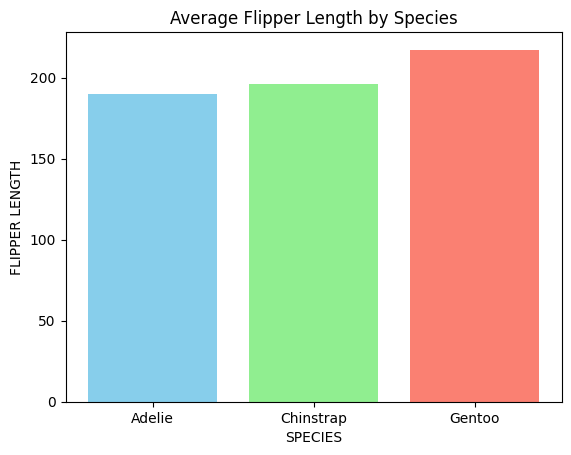

In [46]:
penguins = df.groupby('species')['flipper_length_mm'].mean()
plt.bar(penguins.index, penguins.values , color = ['skyblue', 'lightgreen', 'salmon'])
plt.xlabel("SPECIES")
plt.ylabel("FLIPPER LENGTH")
plt.title("Average Flipper Length by Species")
plt.show()

<h3> Insight: </h3>
<p> Gentoo penguins have the longest average flipper length, which supports their strong swimming ability compared to Adelie and Chinstrap penguins. </p>

<h1> How does flipper length relate to body mass across species? </h1>

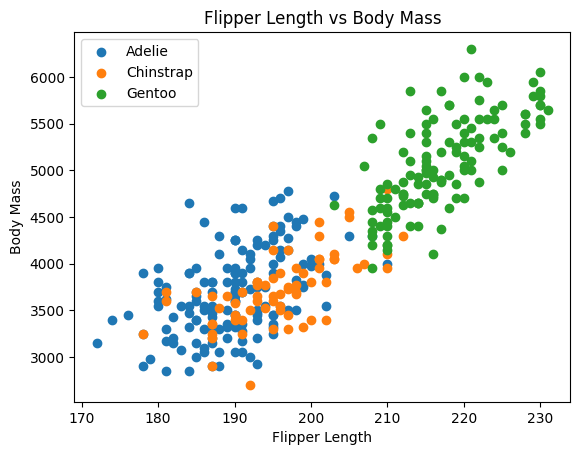

In [49]:
for species, group in df.groupby("species"):
    plt.scatter(group["flipper_length_mm"], group["body_mass_g"], label=species)

plt.xlabel("Flipper Length")
plt.ylabel("Body Mass")
plt.title("Flipper Length vs Body Mass")
plt.legend()
plt.show()


<<h3> Insight: </h3>
<p> Penguins with longer flippers generally have higher body mass, with Gentoo the largest and Adelie the smallest. </p>